<a href="https://colab.research.google.com/github/ssangba02/summer-python-class/blob/main/16_bs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화

In [1]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

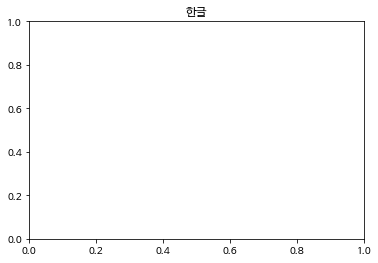

In [2]:
plt.title('한글')
plt.show()

🏷️ **웹 동작원리**


---
<img src ='https://drive.google.com/uc?export=view&id=1amZ78fUnfp3o5Q1XVKDG3eAAzKaYlPrp'>

---

# Beautiful Soup 모듈
+ HTML 및 XML 문서 를 구문 분석하기 위한 Python 패키지
+ DOM 추출
+ 기본적으로 UTF-8 인코딩 방식이지만 CP949도 지원

🏷️ **웹 스크래핑(Web Scraping)과 웹 크롤링(Web Crawling)**


---
+ 웹 스크래핑(Web Scraping) : 웹 사이트 상에서 원하는 정보를 추출하는 기술
+ 웹 크롤링(Web Crawling) : 웹 크롤러(자동화봇)가정해진 규칙에 따라 웹 페이지를 수집해서 각 사이트의 정보를 분류하는 기술




---




## BeautifulSoup 모듈을 활용한 스크래핑

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [33]:
import pandas as pd

### 1. 웹 페이지 가져오기

In [11]:
from urllib.request import urlopen

url = 'https://movie.naver.com/movie/point/af/list.naver'
webpage =  urlopen(url).read().decode()
webpage

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\r\n\t\r\n\t\r\n\t\t\r\n\t\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\r\n\r\n\r\n\r\n\r\n\r\n<meta property="me2:image" content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" content="네이버영화 "/>\r\n<meta property="me2:category1" content="네이버영화"/>\r\n<meta property="me2:category2" content=""/>\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\t<meta property="og:title" content="평점 : 네이버 영화"/>\r\n\t\t<meta property="og:description" content="네티즌 평점과 리뷰 정보 제

### 2. BeautifulSoup 객체 생성

```python
from bs4 import BeautifulSoup as bs

인스턴스명 = BeautifulSoup(markup, parser)
```
* 첫 번째 인자 : HTML 형식의 문자열
* 두 번째 인자 : 첫 번째 인자의 문자열을 해석하기 위한 파서

  * **파서(parser) 종류**
    + html.parser : 파이썬 표준 라이브러리에 포함된 파서로 빠르지만 유연하지 않기 때문에 단순한 HTML문서에 사용

        ```
        BeautifulSoup(markup, "html.parser")
        ```

    + lxml : 매우 빠르고 유연하지만 외부 의존
      - lxml의 HTML 파서
          ```
          BeautifulSoup(markup, "lxml")
          ```
      - lxml의 XML 파서
          ```
          BeautifulSoup(markup, "lxml-xml")
          ```

    + html5lib : 웹 브라우저와 동일한 방식으로 페이지 구문 분석하는 파서로 매우 느리지만 매우 유연하지만 외부 의존
        ```
        BeautifulSoup(markup, "html5lib")
      ```

In [7]:
from bs4 import BeautifulSoup as bs

In [12]:
naver =  bs(webpage, 'html.parser')
type(naver)

bs4.BeautifulSoup

In [15]:
trs = naver.select('#old_content > table tr')[1:]
trs[0]

<tr>
<td class="ac num">18346511</td>
<td class="title">
<a class="movie color_b" href="?st=mcode&amp;sword=188146&amp;target=after">건달티처</a>
<div class="list_netizen_score">
<span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
</div>
<br/>대한민국 역사에 손꼽히지못함. 
			
			
			
				
				
				
				<a class="report" href="#" onclick="report('sch1****', 'dzJxAZLDxX9fh+ycWF+YY8EnqYL1s/SJkMusLjUxZ88=', '대한민국 역사에 손꼽히지못함.', '18346511', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
</td>
<td class="num"><a class="author" href="javascript:find_list('nickname','18346511');">sch1****</a><br/>22.08.10</td>
</tr>

In [38]:
import numpy as np

In [42]:
#1. 비어 있는 데이터프레임을 만듦
df = pd.DataFrame(columns = {'col1', 'col2', 'col3', 'col4', 'col5', 'col6'})


for item in trs :
  #2. 데이터프레임에 넣을 리스트 생성(6개의 항목을 가니는 리스트)
  lt = []

  #파싱
  tds = item.find_all("td")

  no = tds[0].text
  writer = tds[1].find("a").text
  em = tds[1].find("em").text
  netizen = tds[1].text.split("\n")[5:-2]
  netizen = ' '.join(netizen).strip()
  author = tds[2].text

  #2. 리스트 에 추가
  lt.append(no)
  lt.append(writer)
  lt.append(em)
  lt.append(netizen)
  lt.append(author[:-8])
  lt.append(author[-8:])

  #3. 데이터프레임에 추가
  #3-1. 인덱스값 생성
  idx = df.index.max()
  if np.isnan(idx) : idx = 0
  else : idx = idx + 1

  #4. 데이터 프레임에 추가
  df.loc[idx] = lt
  print(lt)
  print(f'{no}, {writer}, {em}, {netizen}, {author[:-8]}, {author[-8:]}')

['18346511', '건달티처', '10', '대한민국 역사에 손꼽히지못함.', 'sch1****', '22.08.10']
18346511, 건달티처, 10, 대한민국 역사에 손꼽히지못함., sch1****, 22.08.10
['18346510', '헌트', '10', '재미있었어요 기대이상!!!', 'fair****', '22.08.10']
18346510, 헌트, 10, 재미있었어요 기대이상!!!, fair****, 22.08.10
['18346509', '카터', '2', '제발 주적인 북한이랑 동맹으로 안엮었으면 좋겠다 보는 내내 열받네', 'yong****', '22.08.10']
18346509, 카터, 2, 제발 주적인 북한이랑 동맹으로 안엮었으면 좋겠다 보는 내내 열받네, yong****, 22.08.10
['18346508', '헌트', '8', '각자의 사상,각자의 신념', 'ansg****', '22.08.10']
18346508, 헌트, 8, 각자의 사상,각자의 신념, ansg****, 22.08.10
['18346507', '비상선언', '5', '런닝타임을 반으로 잘라서 앞 뒤를 쪼갠 2부작이였다면, 1부는 성공, 2부는 폭망인 영화. 이런 장르 영화에 후반부 스토리는 예상을 하고 가지만 좀 더 짧고 간결하게 다른 연출 방식을 택했으면 어땠을까 하는 아쉬움.', 'take****', '22.08.10']
18346507, 비상선언, 5, 런닝타임을 반으로 잘라서 앞 뒤를 쪼갠 2부작이였다면, 1부는 성공, 2부는 폭망인 영화. 이런 장르 영화에 후반부 스토리는 예상을 하고 가지만 좀 더 짧고 간결하게 다른 연출 방식을 택했으면 어땠을까 하는 아쉬움., take****, 22.08.10
['18346506', '비상선언', '1', '배우가 아깝다특히 회항하는 부분부터는 영화관 안나간걸 후회중..', 'harr****', '22.08.10']
18346506, 비상선언, 1, 배우가 아깝다특히 회항하는 부분부터는 영화관 안나간걸 후회

In [46]:
df.columns = ['번호', '영화명', '평점', '리뷰', '아이디', '작성일']
df

,번호,영화명,평점,리뷰,아이디,작성일
0,18346511,건달티처,10,대한민국 역사에 손꼽히지못함.,sch1****,22.08.10
1,18346510,헌트,10,재미있었어요 기대이상!!!,fair****,22.08.10
2,18346509,카터,2,제발 주적인 북한이랑 동맹으로 안엮었으면 좋겠다 보는 내내 열받네,yong****,22.08.10
3,18346508,헌트,8,"각자의 사상,각자의 신념",ansg****,22.08.10
4,18346507,비상선언,5,"런닝타임을 반으로 잘라서 앞 뒤를 쪼갠 2부작이였다면, 1부는 성공, 2부는 폭망인...",take****,22.08.10
5,18346506,비상선언,1,배우가 아깝다특히 회항하는 부분부터는 영화관 안나간걸 후회중..,harr****,22.08.10
6,18346505,헌트,8,총격씬에 매우 공들인 티가 납니다 하지만 고문장면이 많고 길어서 보기가 힘들었습니다...,seun****,22.08.10
7,18346504,헌트,10,배우들 연기도 뛰어났고 스토리도 짱짱하니 감동깊게 관람했습니다,pure****,22.08.10
8,18346503,헌트,8,초심자의 행운을 제대로 보여준 이정재의 첫 감독데뷔작,kjh8****,22.08.10
9,18346502,한산: 용의 출현,10,심장 쫄리면서 너무 재밌게 본 영화.. 한번 더 보고싶네요..!,love****,22.08.10


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      10 non-null     object
 1   영화명     10 non-null     object
 2   평점      10 non-null     object
 3   리뷰      10 non-null     object
 4   아이디     10 non-null     object
 5   작성일     10 non-null     object
dtypes: object(6)
memory usage: 560.0+ bytes


In [49]:
df['평점'] = df['평점'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      10 non-null     object
 1   영화명     10 non-null     object
 2   평점      10 non-null     int64 
 3   리뷰      10 non-null     object
 4   아이디     10 non-null     object
 5   작성일     10 non-null     object
dtypes: int64(1), object(5)
memory usage: 560.0+ bytes


In [51]:
dfg = df.groupby('영화명').mean()
dfg

,평점
영화명,
건달티처,10.0
비상선언,3.0
카터,2.0
한산: 용의 출현,10.0
헌트,8.8


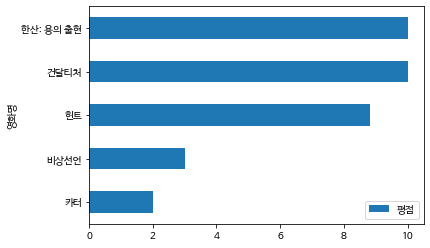

In [55]:
dfg.sort_values('평점').plot(kind = 'barh')
plt.show()

### 3. **Beautiful Soup 파싱 메소드**
+ 태그명
  + **.find(태그명)** : 조건에 맞는 태그 1개만 찾음
  + **.find_all(태그명)** : 조건에 맞는 모든 태그 찾음
+ css선택자
  + **.select_one(선택자)** : 조건에 맞는 CSS선택자 1개만 찾음
  + **.select(선택자)** : 조건에 맞는 CSS선택자 찾음